In [1]:
!pip install pandas matplotlib seaborn cloud-sql-python-connector[pymysql] ipywidgets

In [2]:
!pip install itables

  Using cached itables-2.2.5-py3-none-any.whl.metadata (8.4 kB)
Using cached itables-2.2.5-py3-none-any.whl (1.4 MB)


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud.sql.connector import Connector
from itables import init_notebook_mode


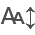

In [ ]:
init_notebook_mode(all_interactive=True)

In [ ]:
# Cloud SQL Connection Config
INSTANCE_CONNECTION_NAME = ""
DB_USER = ""
DB_PASS = ""
DB_NAME = ""

In [7]:
# Initialize Cloud SQL Connector
connector = Connector()

def get_connection():
    """Creates and returns a Cloud SQL database connection."""
    conn = connector.connect(
        INSTANCE_CONNECTION_NAME,
        "pymysql",
        user=DB_USER,
        password=DB_PASS,
        db=DB_NAME
    )
    return conn

In [9]:
# Query 1: Employees hired per job & department in 2021 by quarter
query1 = """
    SELECT 
        d.department, 
        j.job, 
        EXTRACT(QUARTER FROM he.datetime) AS quarter, 
        COUNT(*) AS num_hired
    FROM hired_employees he
    JOIN departments d ON he.department_id = d.id
    JOIN jobs j ON he.job_id = j.id
    WHERE EXTRACT(YEAR FROM he.datetime) = 2021
    GROUP BY d.department, j.job, quarter
    ORDER BY d.department, j.job, quarter;
"""

In [11]:
with get_connection() as conn:
    df1 = pd.read_sql(query1, conn)
df1

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_38108\3538863117.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


,department,job,quarter,num_hired
0,Accounting,Account Representative IV,1,1
1,Accounting,Actuary,2,1
2,Accounting,Analyst Programmer,3,1
3,Accounting,Budget/Accounting Analyst III,2,1
4,Accounting,Cost Accountant,2,1
...,...,...,...,...
1362,Training,Teacher,2,2
1363,Training,Technical Writer,3,1
1364,Training,VP Product Management,1,1
1365,Training,VP Quality Control,2,1


In [13]:
# Pivot the data to get the required format
df_pivot = df1.pivot_table(index=["department", "job"], 
                           columns="quarter", 
                           values="num_hired", 
                           aggfunc="sum", 
                           fill_value=0)

# Rename columns to match Q1, Q2, Q3, Q4
df_pivot.columns = [f"Q{int(col)}" for col in df_pivot.columns]
df_pivot.reset_index(inplace=True)

# Display the final DataFrame
print(df_pivot)

     department                            job  Q1  Q2  Q3  Q4
0    Accounting      Account Representative IV   1   0   0   0
1    Accounting                        Actuary   0   1   0   0
2    Accounting             Analyst Programmer   0   0   1   0
3    Accounting  Budget/Accounting Analyst III   0   1   0   0
4    Accounting                Cost Accountant   0   1   0   0
..          ...                            ...  ..  ..  ..  ..
928    Training                        Teacher   0   2   0   0
929    Training               Technical Writer   0   0   1   0
930    Training          VP Product Management   1   0   0   0
931    Training             VP Quality Control   0   1   0   0
932    Training              Web Developer III   0   1   0   0

[933 rows x 6 columns]


In [17]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [19]:
display(df_pivot)

,department,job,Q1,Q2,Q3,Q4
0,Accounting,Account Representative IV,1,0,0,0
1,Accounting,Actuary,0,1,0,0
2,Accounting,Analyst Programmer,0,0,1,0
3,Accounting,Budget/Accounting Analyst III,0,1,0,0
4,Accounting,Cost Accountant,0,1,0,0
...,...,...,...,...,...,...
928,Training,Teacher,0,2,0,0
929,Training,Technical Writer,0,0,1,0
930,Training,VP Product Management,1,0,0,0
931,Training,VP Quality Control,0,1,0,0


In [10]:
# Display DataFrame as an interactive table
interactive_table = widgets.Output()
with interactive_table:
    display(df_pivot)

display(interactive_table)

Output()

In [14]:
import ipywidgets as widgets
from IPython.display import display

In [15]:
display(df_pivot)

,department,job,Q1,Q2,Q3,Q4
0,Accounting,Account Representative IV,1,0,0,0
1,Accounting,Actuary,0,1,0,0
2,Accounting,Analyst Programmer,0,0,1,0
3,Accounting,Budget/Accounting Analyst III,0,1,0,0
4,Accounting,Cost Accountant,0,1,0,0
...,...,...,...,...,...,...
928,Training,Teacher,0,2,0,0
929,Training,Technical Writer,0,0,1,0
930,Training,VP Product Management,1,0,0,0
931,Training,VP Quality Control,0,1,0,0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_69432\516688527.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x="quarter", y="num_hired", hue="job", ci=None)


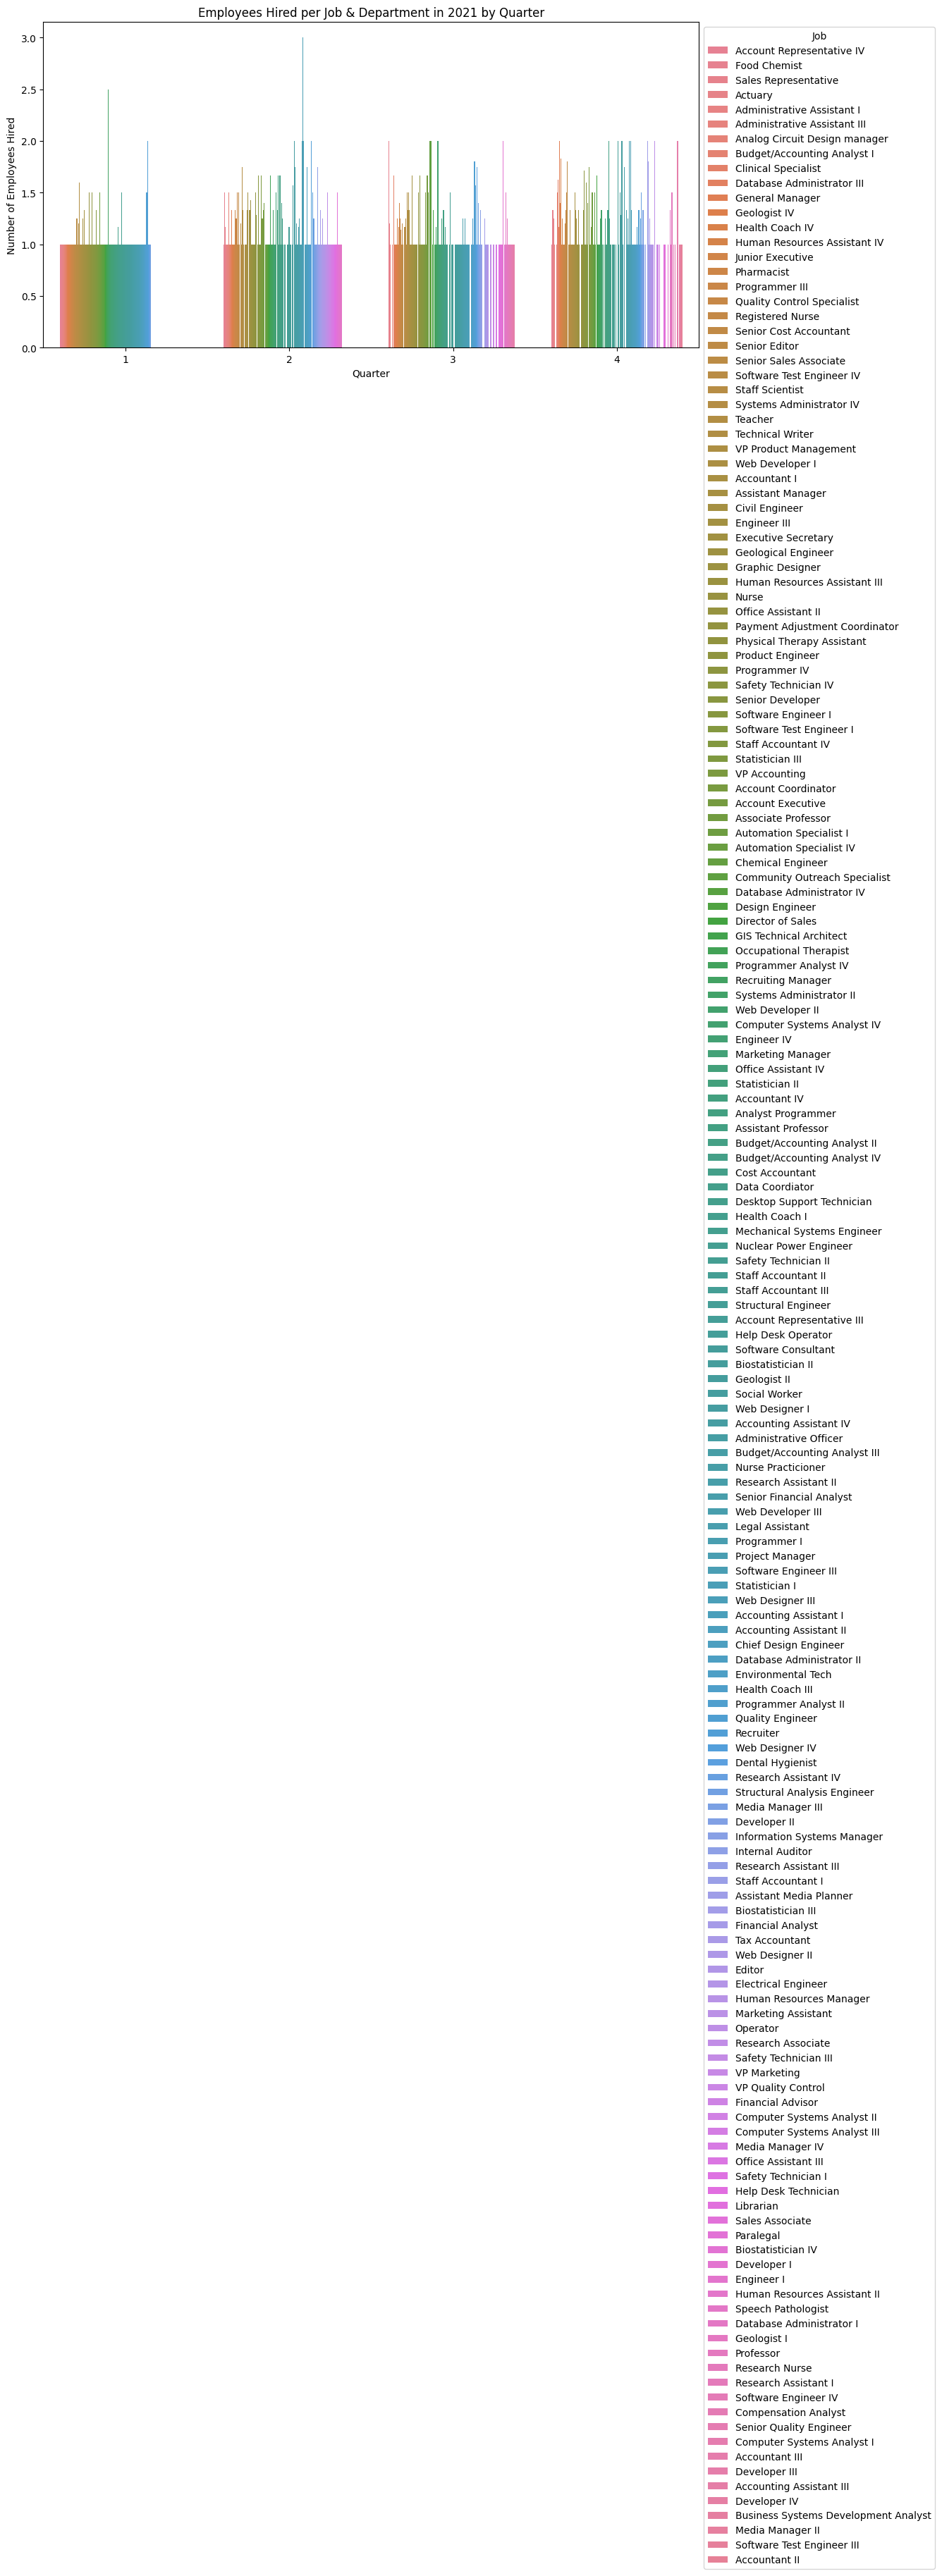

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x="quarter", y="num_hired", hue="job", ci=None)
plt.title("Employees Hired per Job & Department in 2021 by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Employees Hired")
plt.legend(title="Job", bbox_to_anchor=(1, 1))
plt.show()